# Download the dataset


In [2]:
# import Kaggle dataset
!pip install -q kaggle
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 835.1 kB/s eta 0:00:00


In [3]:
# upload the csv dataset files
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mprathicashetty","key":"d85ce8d9e05031c64ad6867d6548ea82"}'}

In [4]:
# create kaggle folder to save the dataset
!mkdir ~/.kaggle

In [5]:
# copy the kaggle.json file containing the api key to folder created
!cp kaggle.json ~/.kaggle/

In [6]:
# grant permissions for the json file to run
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# list all the datasets
!kaggle datasets list

ref                                                    title                                   size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -------------------------------------  -----  -------------------  -------------  ---------  ---------------  
waqi786/cats-dataset                                   🐾 Cats Dataset                           6KB  2024-07-31 06:12:49           1867         39  1.0              
abhayayare/employee-data-simulation-it-industry        Employee Data Simulation: IT Industry    4KB  2024-07-21 15:26:17           2070         35  1.0              
anthonytherrien/depression-dataset                     Depression Dataset                       9MB  2024-07-19 20:42:08           1338         28  1.0              
patricklford/global-ev-sales-2010-2024                 Global EV Sales: 2010-2024              83KB  2024-07-19 13:40:22           2670         37  1.0              
rabi

In [8]:
# download the dataset using api
!kaggle datasets download -d shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis
License(s): CC0-1.0
 35% 9.00M/25.7M [00:00<00:00, 83.3MB/s]
100% 25.7M/25.7M [00:00<00:00, 140MB/s] 


In [9]:
# unzip the dataset to work on them
!unzip dataco-smart-supply-chain-for-big-data-analysis.zip

Archive:  dataco-smart-supply-chain-for-big-data-analysis.zip
  inflating: DataCoSupplyChainDataset.csv  
  inflating: DescriptionDataCoSupplyChain.csv  
  inflating: tokenized_access_logs.csv  


# Import Python libraries

In [94]:
# import all the required python libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
from sklearn import preprocessing
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.under_sampling import NearMiss
from category_encoders import LeaveOneOutEncoder
import warnings
warnings.filterwarnings("ignore")

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Import the Dataset

In [11]:
# Check in which directory the dataset is present
!ls
df = pd.read_csv('DataCoSupplyChainDataset.csv', header=0, encoding='unicode_escape')
pd.set_option('display.max_columns', None)

dataco-smart-supply-chain-for-big-data-analysis.zip  kaggle.json
DataCoSupplyChainDataset.csv			     sample_data
DescriptionDataCoSupplyChain.csv		     tokenized_access_logs.csv


In [12]:
# load few initial sets of data
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Features of the dataset

In [13]:
# check the features and datatypes of the dataset loaded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

# Data Visualisation and Feature Engineering

In [14]:
def basic_info(df):
    print('Total data-points :',df.size)
    print('Total features: ',df.shape[1])
    numerical_features = [f for f in df.columns if df[f].dtypes!='O']
    print('Total numerical features :',len(numerical_features))
    cat_features = [c for c in df.columns if df[c].dtypes=='O']
    print('Total categorical features :',len(cat_features))
    print('Total rows: ',df.shape[0])
    print("\nFeature lists containing null values in percentage:\n")
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            print(column, ': {:.4%}'.format(df[column].isnull().sum() / df[column].shape[0]))
basic_info(df)

Total data-points : 9567507
Total features:  53
Total numerical features : 29
Total categorical features : 24
Total rows:  180519

Feature lists containing null values in percentage:

Customer Lname : 0.0044%
Customer Zipcode : 0.0017%
Order Zipcode : 86.2397%
Product Description : 100.0000%


Total data-points : 4874013
Total features:  27
Total numerical features : 8
Total categorical features : 19
Total rows:  180519

Feature lists containing null values in percentage:

Customer Zipcode : 0.0017%


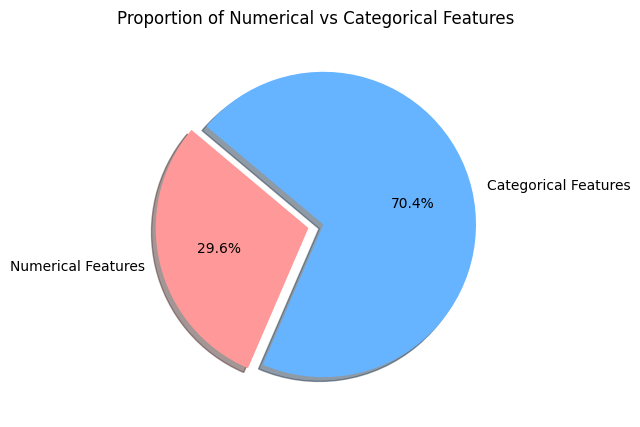

In [45]:
def basic_info(df):
    print('Total data-points :', df.size)
    print('Total features: ', df.shape[1])

    numerical_features = [f for f in df.columns if df[f].dtypes != 'O']
    print('Total numerical features :', len(numerical_features))

    cat_features = [c for c in df.columns if df[c].dtypes == 'O']
    print('Total categorical features :', len(cat_features))

    print('Total rows: ', df.shape[0])
    print("\nFeature lists containing null values in percentage:\n")

    null_values = {}
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            null_percentage = df[column].isnull().sum() / df[column].shape[0]
            null_values[column] = null_percentage
            print(column, ': {:.4%}'.format(null_percentage))

    # Pie Chart for Numerical vs Categorical Features
    labels = 'Numerical Features', 'Categorical Features'
    sizes = [len(numerical_features), len(cat_features)]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)  # explode the 1st slice (Numerical Features)

    plot.figure(figsize=(10, 5))

    plot.subplot(1, 2, 1)
    plot.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plot.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plot.title('Proportion of Numerical vs Categorical Features')

# Call the function with the dataframe
basic_info(df)


In [16]:
# get the features based on the categories
def getTotalCols(df):
    return df.columns.tolist()

def getCtgCols(df):
    cols = df.columns.tolist()
    num_cols = df._get_numeric_data().columns
    return list(set(cols) - set(num_cols))

def getNumCols(df):
    return df._get_numeric_data().columns

def getList(list_1,list_2):
    return list(set(list_1) - set(list_2))

In [17]:
# Numerical feature analysis
total_ftr = len(getTotalCols(df))
num_ftr = getNumCols(df)

print("\nNumerical features:\n")
for ftr in num_ftr:
    print(ftr)



Numerical features:

Days for shipping (real)
Days for shipment (scheduled)
Benefit per order
Sales per customer
Late_delivery_risk
Category Id
Customer Id
Customer Zipcode
Department Id
Latitude
Longitude
Order Customer Id
Order Id
Order Item Cardprod Id
Order Item Discount
Order Item Discount Rate
Order Item Id
Order Item Product Price
Order Item Profit Ratio
Order Item Quantity
Sales
Order Item Total
Order Profit Per Order
Order Zipcode
Product Card Id
Product Category Id
Product Description
Product Price
Product Status


In [23]:
#Display column pairs with correlation=1
def corrFtr(df,x):
    # Select only numerical columns
    numerical_df = df.select_dtypes(include=['number'])

    c = numerical_df.corr().abs().round(2)

    # Select upper triangle of correlation matrix
    c = c.where(np.triu(np.ones(c.shape), k=1).astype(bool))

    #find column pairs with correlation = 1
    c = c.fillna(0)
    c = c.loc[(c<x).any(axis=1)] #removing rows with all less than x correlations
    c = c.loc[:, (c<x).any(axis=0)] #removing columns with all less than x correlations
    #display(c)
    print(c[c >= x].stack())
    return()

corrFtr(df, .8)

Benefit per order         Order Item Profit Ratio    0.82
                          Order Profit Per Order     1.00
Sales per customer        Sales                      0.99
                          Order Item Total           1.00
Category Id               Department Id              0.89
                          Order Item Cardprod Id     0.99
                          Product Card Id            0.99
                          Product Category Id        1.00
Customer Id               Order Customer Id          1.00
Customer Zipcode          Longitude                  0.92
Department Id             Order Item Cardprod Id     0.91
                          Product Card Id            0.91
                          Product Category Id        0.89
Order Id                  Order Item Id              1.00
Order Item Cardprod Id    Product Card Id            1.00
                          Product Category Id        0.99
Order Item Product Price  Product Price              1.00
Order Item Pro

()

# Draw Heatmap

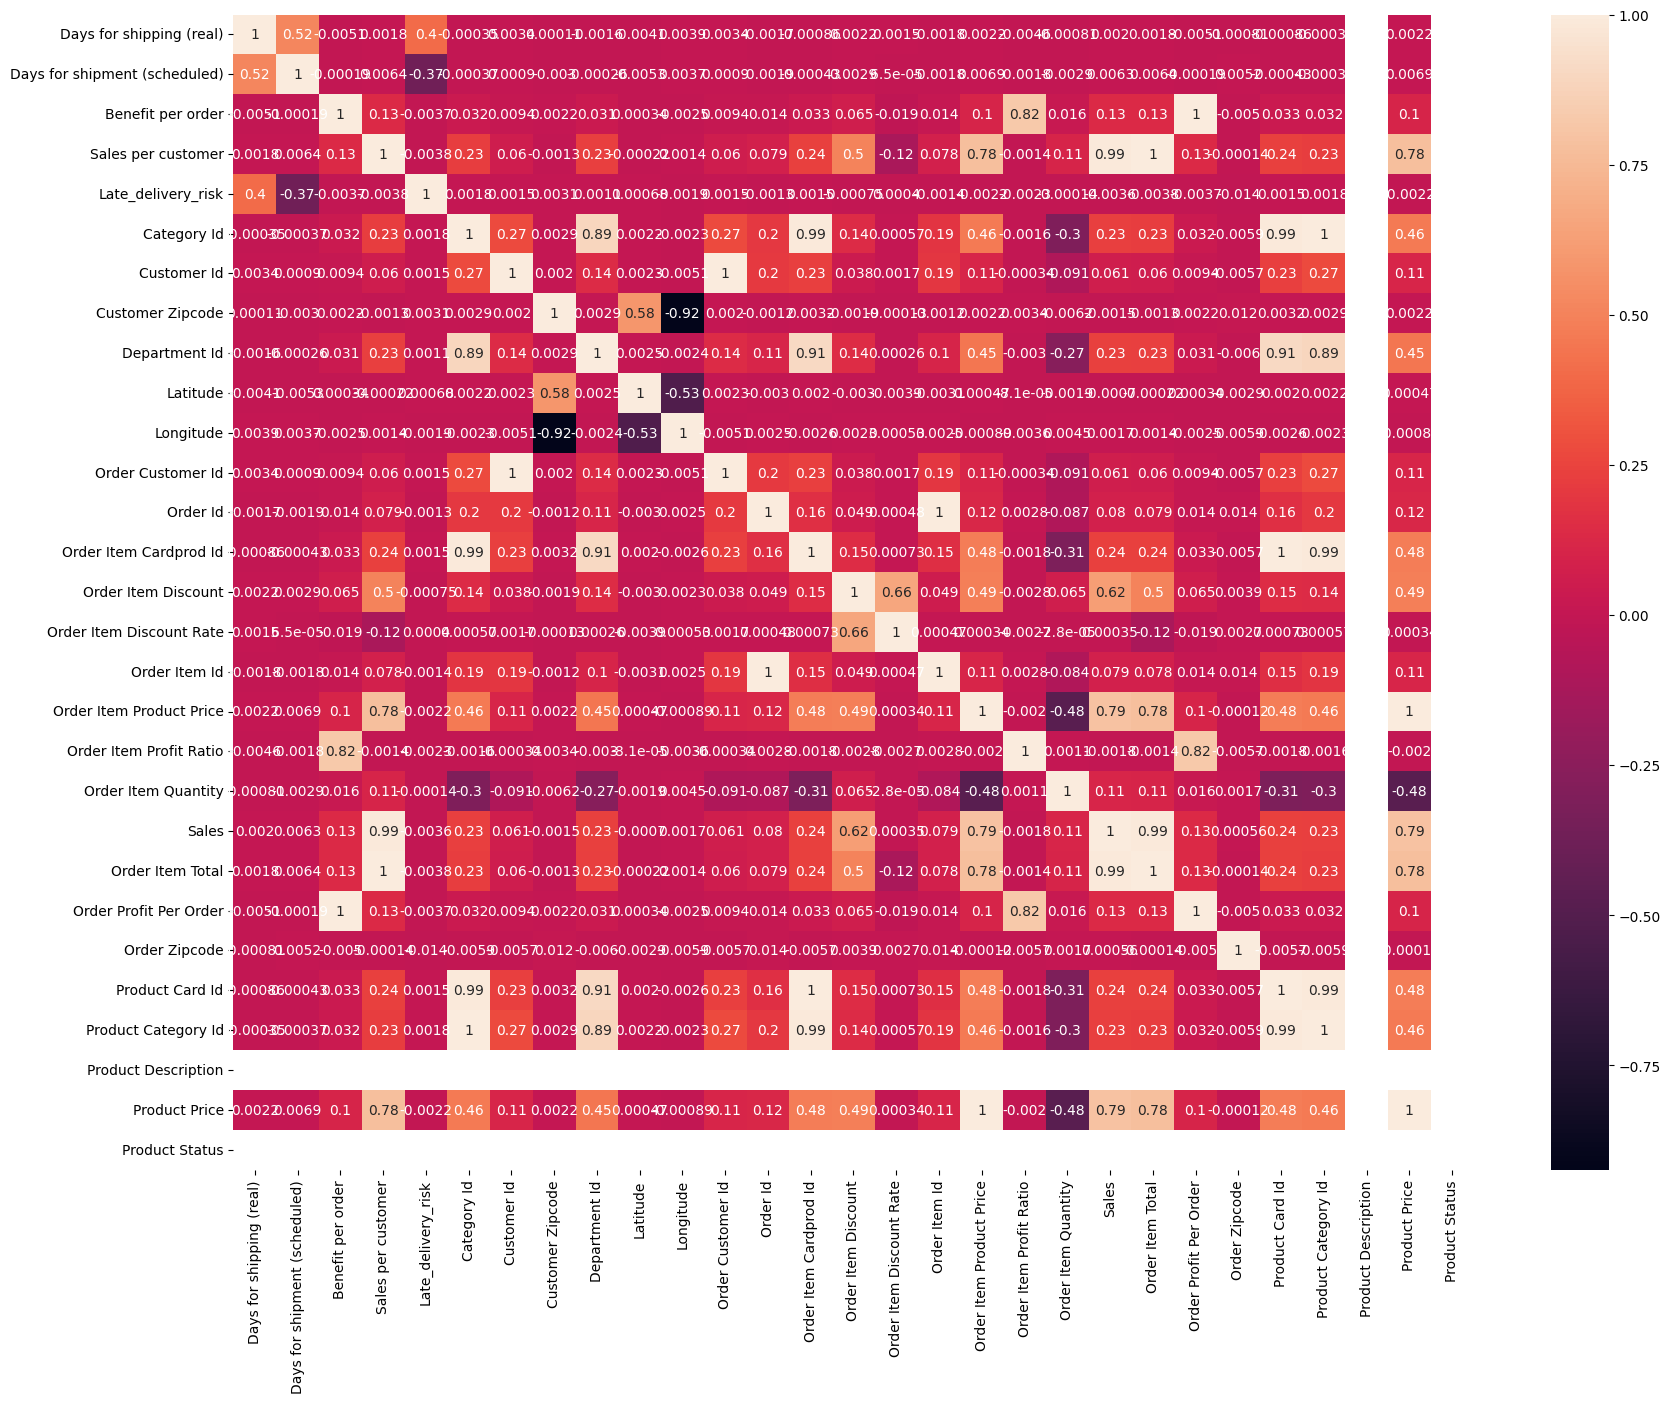

In [26]:
def heatMap(df_heatmap):
    # Select only numerical columns before calculating correlation
    numerical_df = df_heatmap.select_dtypes(include=['number'])
    ftr_corr = numerical_df.corr()

    top_corr=ftr_corr.index
    plot.figure(figsize=(20,15))

    # Use the numerical DataFrame for heatmap
    g=sns.heatmap(numerical_df[top_corr].corr(),annot=True)
    df_heatmap.columns.tolist()

heatMap(df)

### Heatmap Analysis
1. Benefit per order feature contains negative values against Days for shipping(real) and Days for shipment(scheduled).
2. That means negative benefit(loss) can be happend due to late delivery of the products.
3. Moreover fraudulent transections also would be another reasons for negetive benefit(loss) per order.
4. However, the total number of features in this data sets is 53 which quiet high to get a insights from heatmap analysis.
5. Even not all features are required to the context of this projects.
6. The current goal of this project is to detect fraudulent transections and classify the fraud orders.
7. That's why not all the columns are not necessary. So we sortout the unwanted/duplicate features which are not required.
7. Removing those features will help to clearly identify the important features and get insights from existing features.

In [27]:
# Drop unwanted features
def dropCol(df,col_list):
    df.drop(col_list,axis=1,inplace=True)

col_list = ['Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Customer Id','Category Id','Customer Password','Customer Email',
            'Order Zipcode','Product Description','Order Item Product Price',
            'Department Id','Latitude','Longitude','Order Item Cardprod Id','Product Card Id','Product Category Id','Product Image','shipping date (DateOrders)',
            'Order Item Total','Sales','Product Status','Order Customer Id','Order Profit Per Order','Order Item Id','Order Id']
dropCol(df,col_list)
df.shape

(180519, 28)

# Categorial Feature Analysis

In [28]:
ctg_ftr = getCtgCols(df)

print("Categorical features:\n")
for ftr in ctg_ftr:
    print(ftr)

Categorical features:

Order Country
Order State
Customer Fname
Market
Customer Segment
Customer Lname
Product Name
Customer City
Customer State
Category Name
Type
order date (DateOrders)
Delivery Status
Order Region
Order Status
Customer Country
Shipping Mode
Customer Street
Department Name
Order City


## **The categorical features can be devided into four categories:**

1. Customer related informations

- ['Customer Country','Customer Fname','Customer Lname','Customer Segment','Customer City','Customer State','Customer Street']
2. Order related informations

- ['Order Region','Order Country','Order State','Order City']
3. Product related informations

- ['Product Name','Department Name','Category Name','Market']
4. Delivery / Shippig related informations

- ['Delivery Status','Type','Shipping Mode']
5. Key Feature

- ['Order Status']

# Key Feature[Order Status]
Order Status is our key features. Let's see what are the other unique values this feature contains.

In [29]:
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

If we merge the Customer Fname(1st name) and Customer Lname(last name) into Customer Name, it would help to get more clear insights.

In [30]:
df['Customer Name'] = df['Customer Fname'].astype(str)+" "+df['Customer Lname'].astype(str)
df.drop(['Customer Fname','Customer Lname'],axis=1,inplace=True)

In [31]:
customer_feature = ['Customer Country','Customer Name','Customer Segment','Customer City','Customer State','Customer Street']
order_feature = ['Order Region','Order Country','Order State','Order City']
product_feature = ['Product Name','Department Name','Category Name','Market']
shipping_feature = ['Type','Shipping Mode']
order_date = ['order date (DateOrders)']

ctg_cols = getCtgCols(df)
df.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode,Customer Name
0,DEBIT,91.250000,314.640015,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725.0,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,0.29,1,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,Standard Class,Cally Holloway
1,TRANSFER,-249.089996,311.359985,Late delivery,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,725.0,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,-0.80,1,South Asia,Rajastán,PENDING,Smart watch,327.75,Standard Class,Irene Luna
2,CASH,-247.779999,309.720001,Shipping on time,Sporting Goods,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125.0,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,18.030001,0.06,-0.80,1,South Asia,Rajastán,CLOSED,Smart watch,327.75,Standard Class,Gillian Maldonado
3,DEBIT,22.860001,304.809998,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027.0,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,22.940001,0.07,0.08,1,Oceania,Queensland,COMPLETE,Smart watch,327.75,Standard Class,Tana Tate
4,PAYMENT,134.210007,298.250000,Advance shipping,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,725.0,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,29.500000,0.09,0.45,1,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,Standard Class,Orli Hendricks


Let's just get a quick look from the suspected fraud orders.

In [32]:
df[(df['Order Status'] == "SUSPECTED_FRAUD")].head()

,Type,Benefit per order,Sales per customer,Delivery Status,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode,Customer Name
10,TRANSFER,130.580002,272.029999,Shipping canceled,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,4058 Quiet Heights,725.0,Fitness,Pacific Asia,Tokio,Japón,1/13/2018 9:18,55.720001,0.17,0.48,1,Eastern Asia,Tokio,SUSPECTED_FRAUD,Smart watch,327.750000,Second Class,Germane Short
24,TRANSFER,90.279999,288.420013,Shipping canceled,Sporting Goods,Billings,EE. UU.,Corporate,MT,3176 Round Gate,59102.0,Fitness,Pacific Asia,Brisbane,Australia,1/13/2018 4:24,39.330002,0.12,0.31,1,Oceania,Queensland,SUSPECTED_FRAUD,Smart watch,327.750000,Second Class,Simone Vance
183,TRANSFER,28.850000,128.220001,Shipping canceled,Electronics,Freeport,EE. UU.,Consumer,NY,3675 Emerald Goose Bank,11520.0,Footwear,USCA,Houston,Estados Unidos,5/8/2016 17:42,6.750000,0.05,0.23,3,US Center,Texas,SUSPECTED_FRAUD,Under Armour Men's Compression EV SL Slide,44.990002,Standard Class,Patricia Petersen
184,TRANSFER,133.910004,278.970001,Shipping canceled,Cardio Equipment,Fort Washington,EE. UU.,Consumer,MD,9375 Harvest Circuit,20744.0,Footwear,USCA,Gilbert,Estados Unidos,4/2/2016 19:51,21.000000,0.07,0.48,3,West of USA,Arizona,SUSPECTED_FRAUD,Nike Men's Free 5.0+ Running Shoe,99.989998,Standard Class,Julie Petersen
185,TRANSFER,79.160004,272.970001,Shipping canceled,Cardio Equipment,Bakersfield,EE. UU.,Consumer,CA,3993 Thunder Hills Port,93304.0,Footwear,USCA,San Jose,Estados Unidos,8/14/2016 2:51,27.000000,0.09,0.29,3,West of USA,California,SUSPECTED_FRAUD,Nike Men's Free 5.0+ Running Shoe,99.989998,Standard Class,Lisa Smith


Let's create a function to visualize the top fraudulent entities on each category

In [33]:
def top_fraudulent_ft(ctg_cols,n_largest,df = df[(df['Order Status'] == 'SUSPECTED_FRAUD')]):
    #Top 10 customers with most fraud
    for ctg_col in ctg_cols:
        df[ctg_col].value_counts().nlargest(n_largest).sort_values(ascending=True).plot.barh(figsize=(10,4), title="Top "+" fraudulent "+ ctg_col)
        plot.figure()

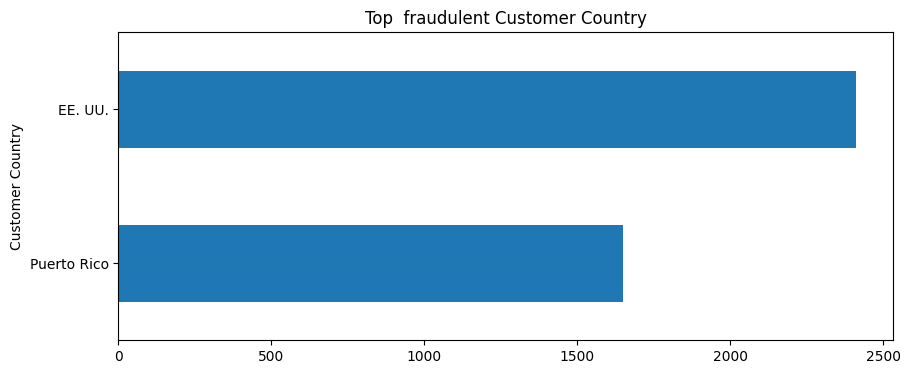

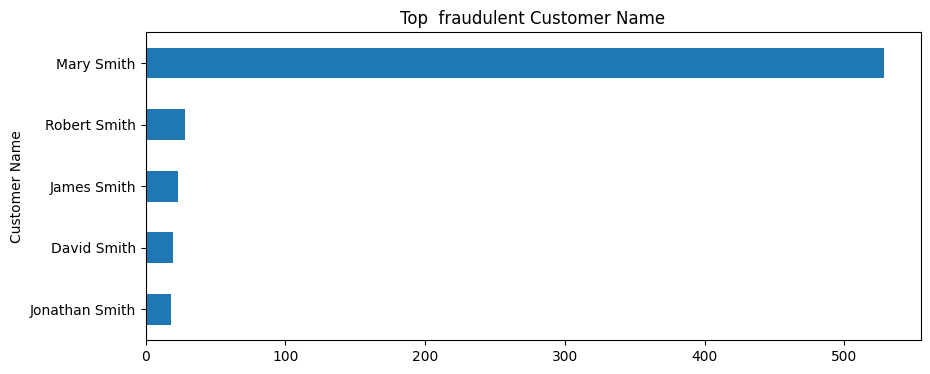

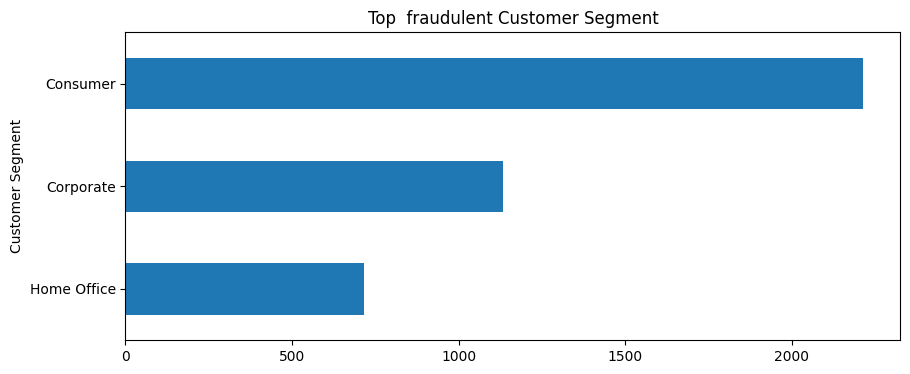

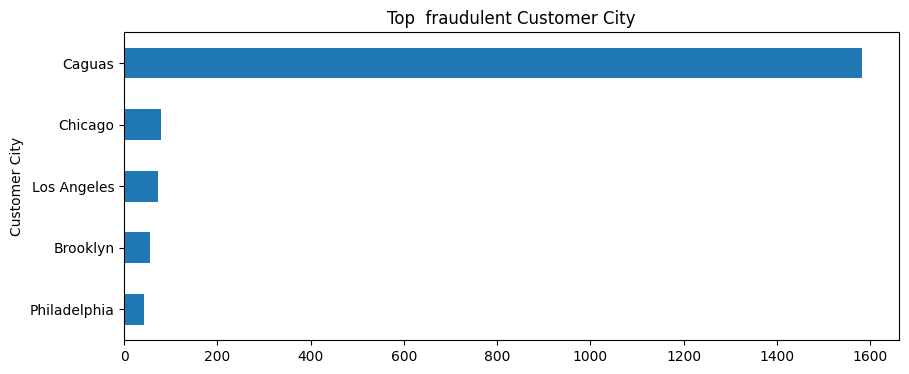

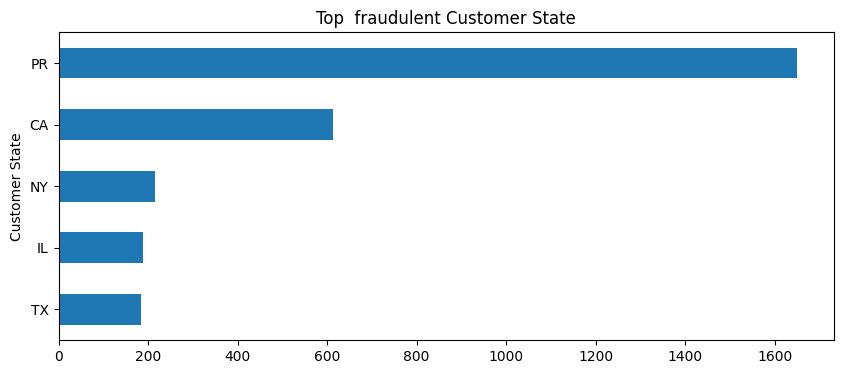

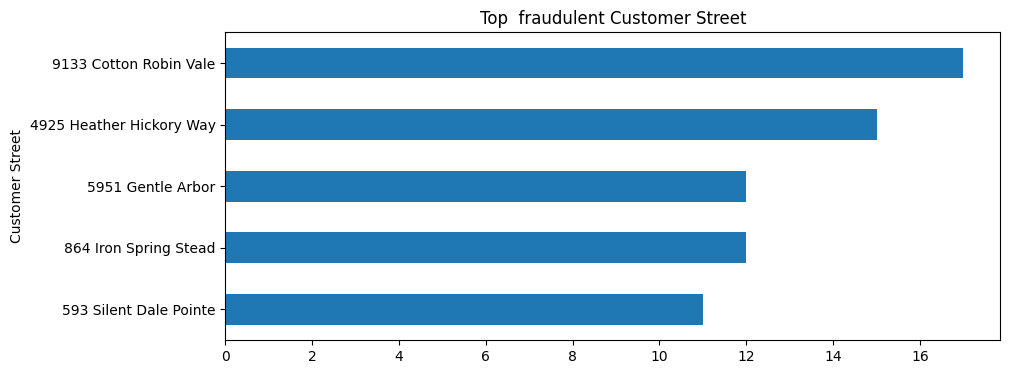

<Figure size 640x480 with 0 Axes>

In [34]:
top_fraudulent_ft(customer_feature,5)

It seems that all fraudulent orders came from only two countries EE.UU and Puerto Rico. Where as top three fraudulent states are PR, CA, NY which are codenames of Puerto Rico, California and New york. But the US is not present in the top fraudulent customers country. Let's see what are the others customers country presents in this data sets.

In [46]:
# Countries with customers involved with most fraud
customer_country = df[(df['Order Status']=='SUSPECTED_FRAUD')]['Customer Country'].unique().tolist()
print("Customer countries:",customer_country)


Customer countries: ['Puerto Rico', 'EE. UU.']


In [63]:
order_country = df[(df['Order Status']=='SUSPECTED_FRAUD')]['Order Country'].unique().tolist()
print("Number of order countries:",len(order_country))


Number of order countries: 102


Customer Country column contains only two values, where Order Country columns contains 102 values. It is obvious that Customer Country column is defected and contain false values. So we need to delete this feature later.

In [48]:
df.drop(['Customer Country'],axis=1,inplace=True)

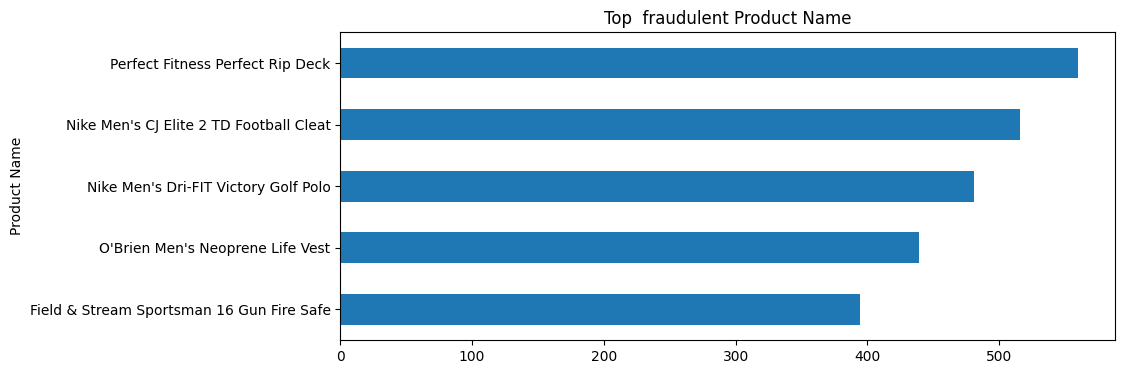

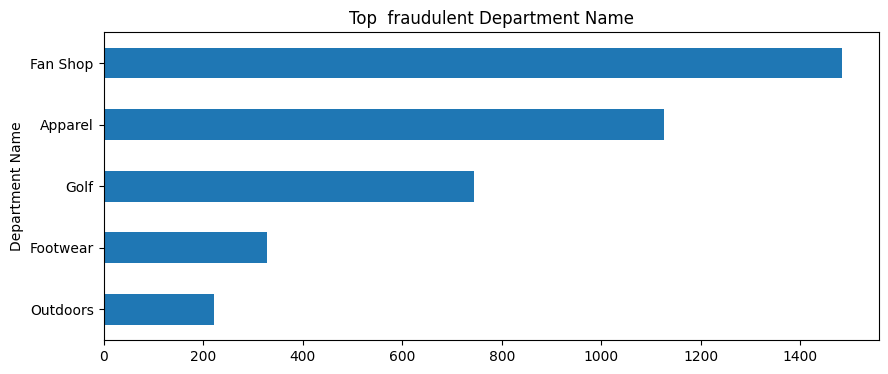

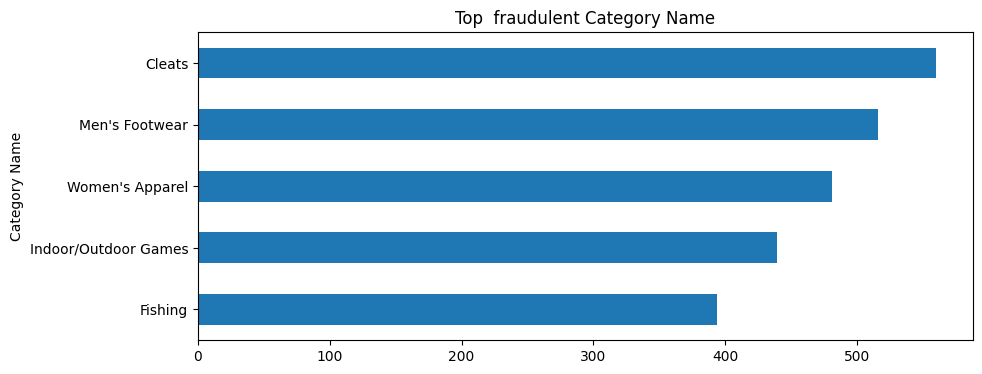

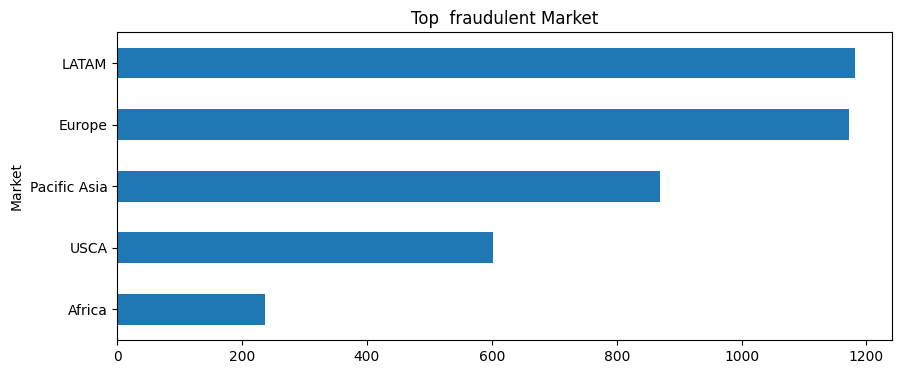

<Figure size 640x480 with 0 Axes>

In [49]:
top_fraudulent_ft(product_feature,5)

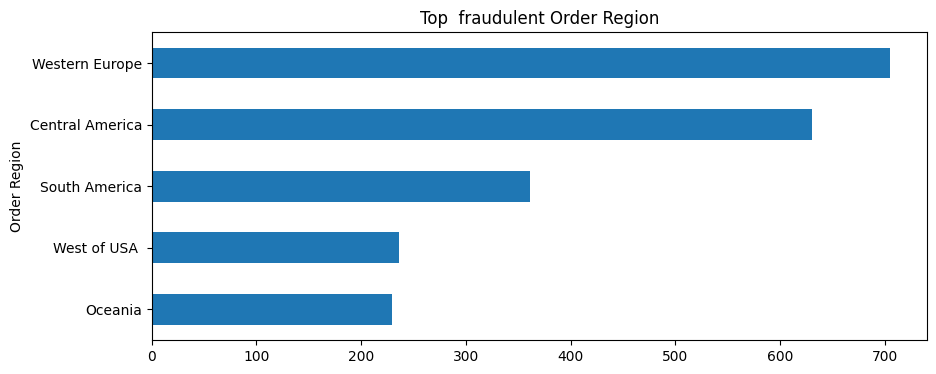

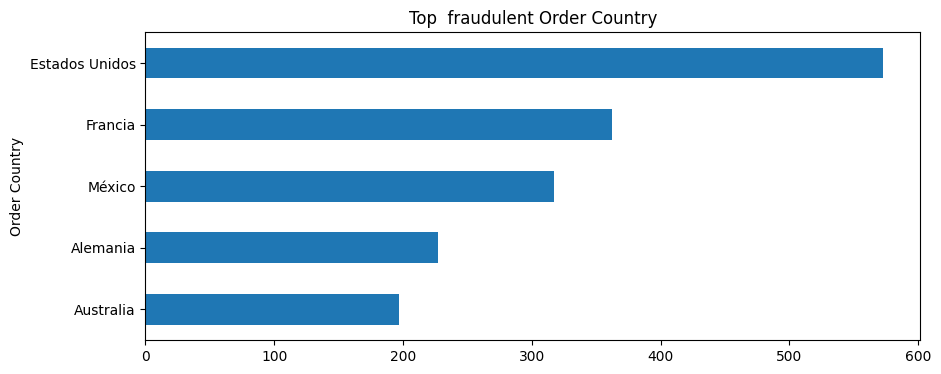

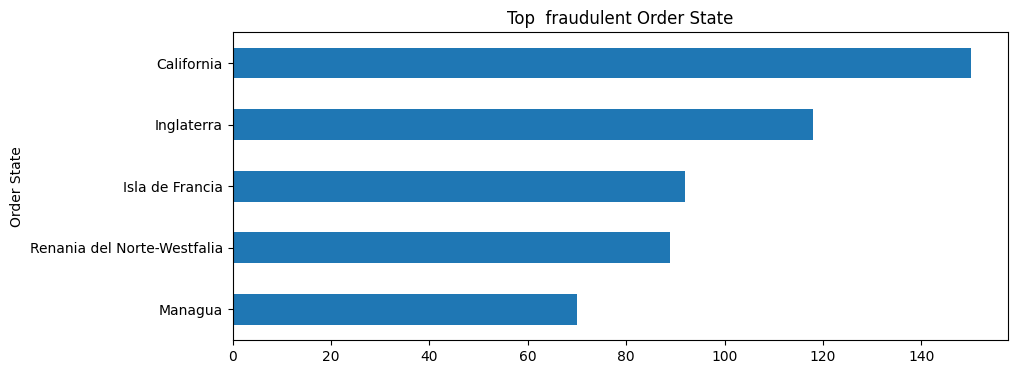

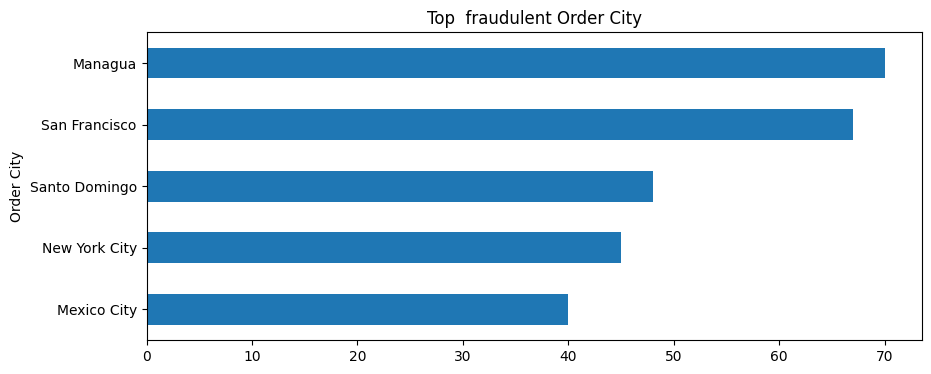

<Figure size 640x480 with 0 Axes>

In [50]:
top_fraudulent_ft(order_feature,5)

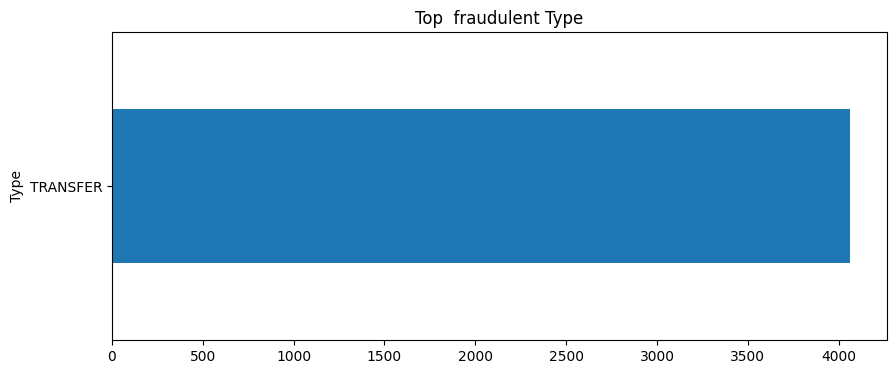

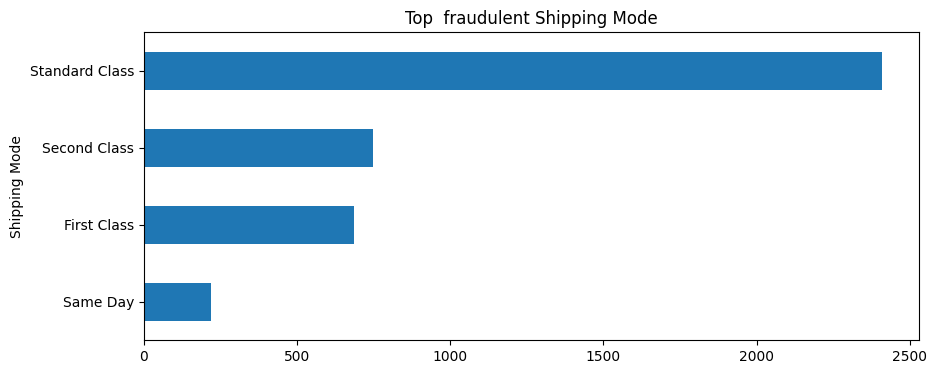

<Figure size 640x480 with 0 Axes>

In [51]:
top_fraudulent_ft(shipping_feature,5)

Let's pick the top fraud customer and do more further investigations. The top fraud suspected fraud customer is:- Mary Smith

In [52]:
df_fraud = df[(df['Customer Name'] == 'Mary Smith')&(df['Order Status'] =='SUSPECTED_FRAUD')]

fraud_location = ['Customer City','Customer State','Customer Street',
                       'Order Region','Order Country','Order State','Order City']
fraud_product = ['Product Name','Department Name','Category Name','Market']
fraud_shipping = ['Type','Shipping Mode']

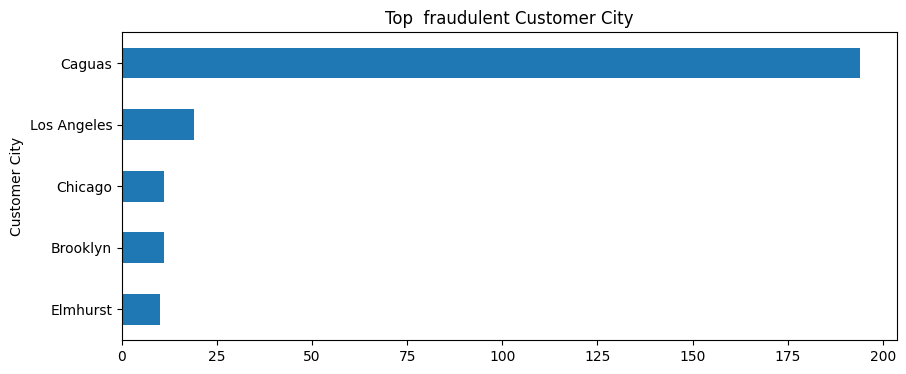

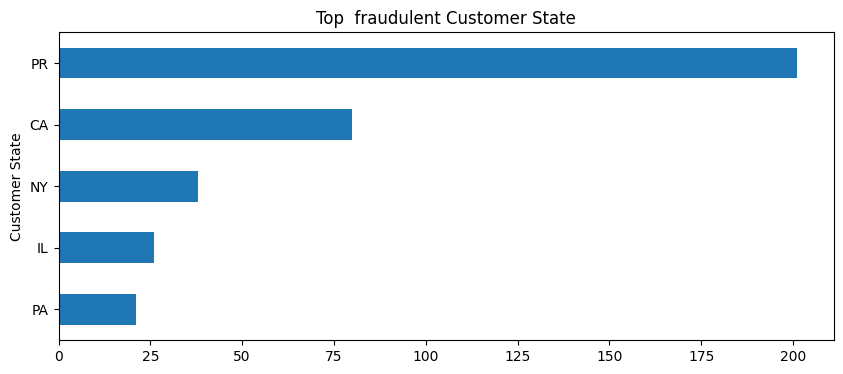

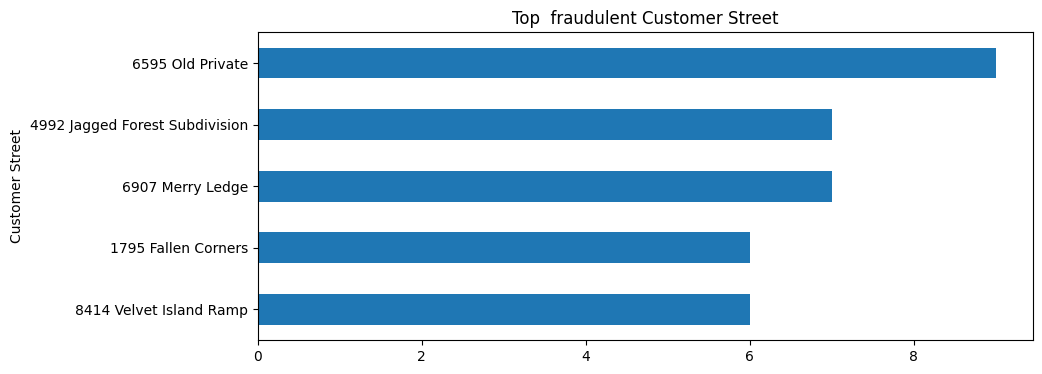

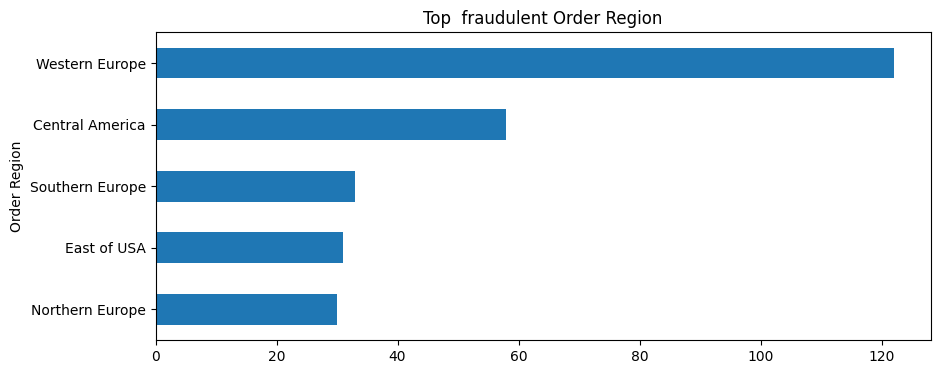

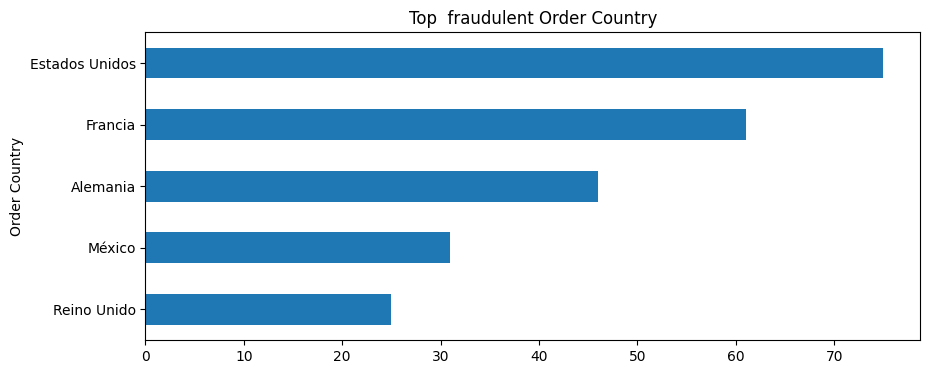

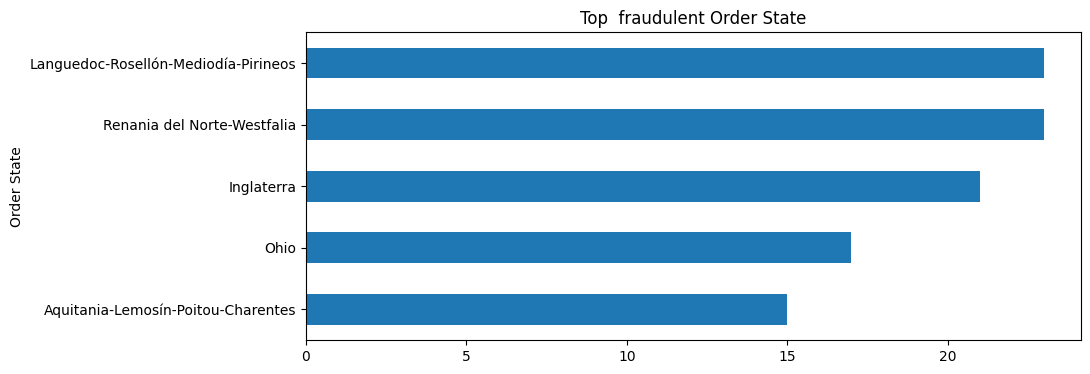

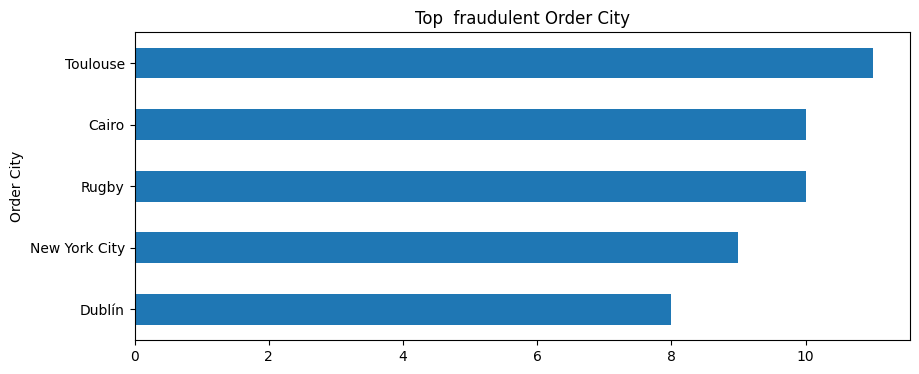

<Figure size 640x480 with 0 Axes>

In [53]:
top_fraudulent_ft(fraud_location,5,df_fraud)

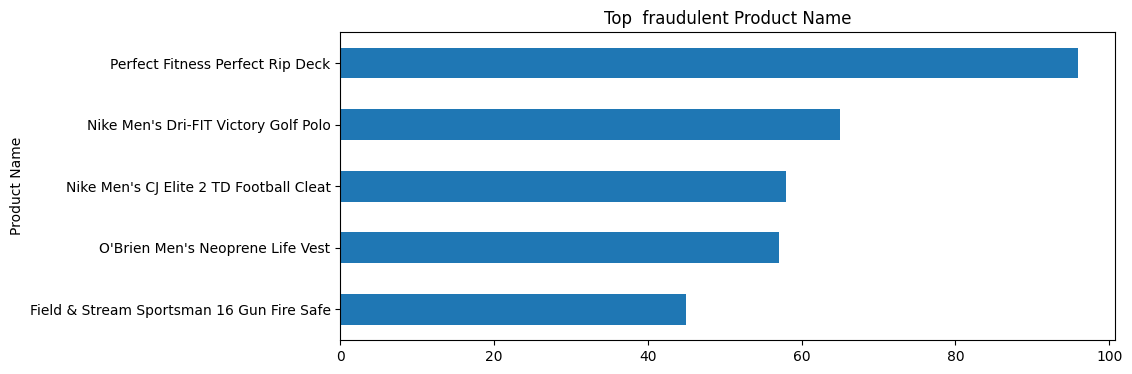

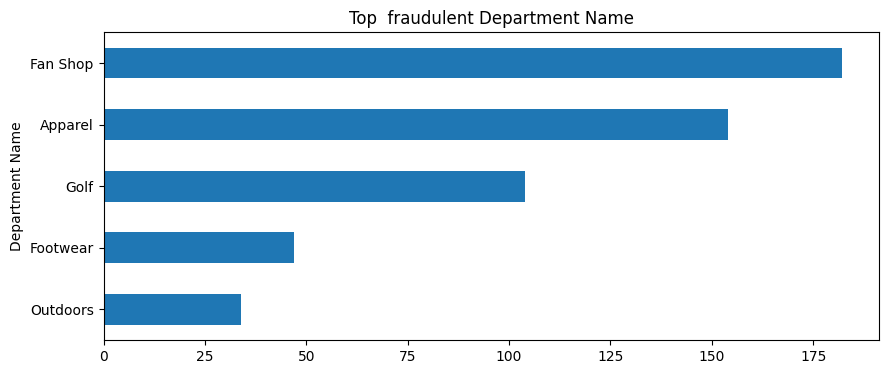

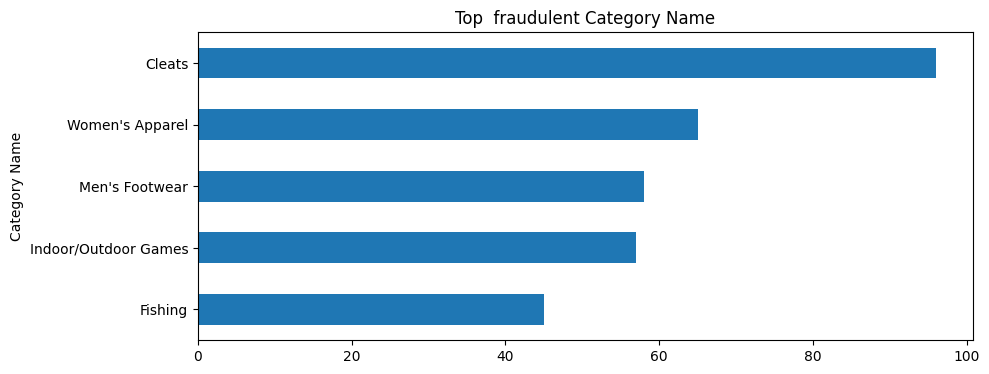

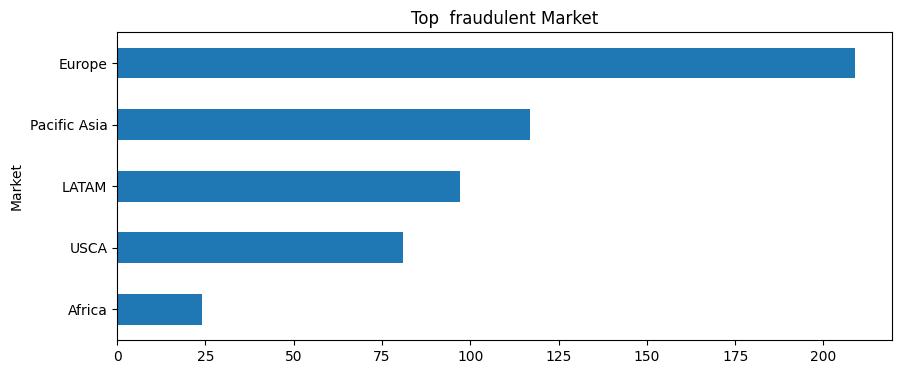

<Figure size 640x480 with 0 Axes>

In [54]:
top_fraudulent_ft(fraud_product,5,df_fraud)

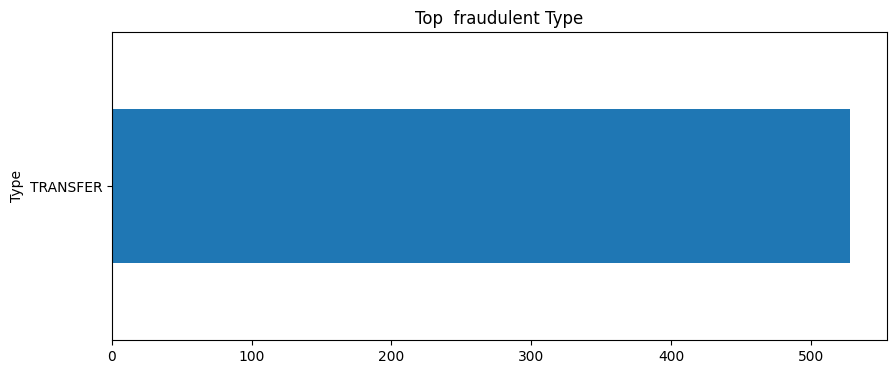

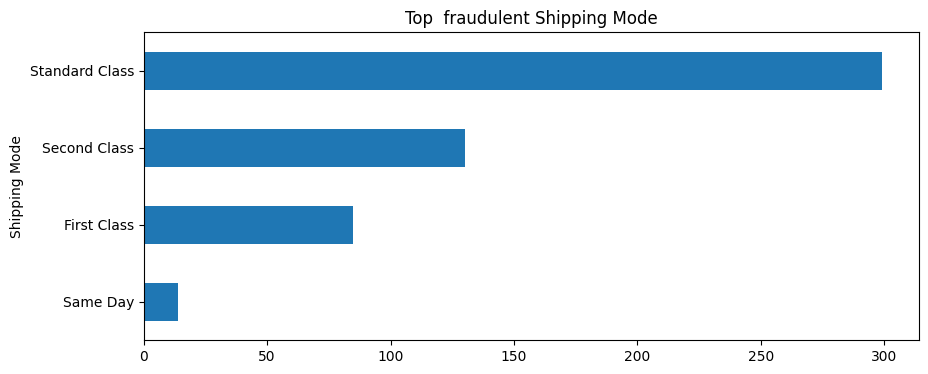

<Figure size 640x480 with 0 Axes>

In [55]:
top_fraudulent_ft(fraud_shipping,5,df_fraud)

### Investigation of Mary Smith:

1. `Locations`:
Mary Smith's living location(Ex: Customer City, Customer State) is totally different from his/her order locations(Ex: Order City, Order State).

2. `Products`:
Most of the products fall into Cleats and Womens Apparel

3. `Payment Type and Shipping Methods`:
The only Payment type is used by Mary Smith is `TRANSFER` The most of the Shipping Method is used by Mary Smith is `Standard Class`

# MODELING
## Important Feature to bulid model:

1. customer_feature:
- ['Customer Country','Customer Name','Customer Segment','Customer City','Customer State','Customer Street'].

2. order_feature:
- ['Order Region','Order Country','Order State','Order City']

3. product_feature:
- ['Product Name','Department Name','Category Name','Market']

4. shipping_feature:
- ['Type','Shipping Mode']

## Drop Null Rows

Customer Lname, Customer Fname, Customer Zipcode contains very few number of null values. Dropping those few number of null values won't affect the quality of dataset that much

In [67]:
def dropNullRows(df,col_list):
        df.dropna(axis=0,inplace=True)


col_list = ['Customer Lname','Customer Fname','Customer Zipcode']
dropNullRows(df,col_list)

In [68]:
df_model = df.copy()
customer_feature = ['Customer Name','Customer Segment','Customer City','Customer State','Customer Street']
order_feature = ['Order Region','Order Country','Order State','Order City']
product_feature = ['Product Name','Department Name','Category Name','Market']
shipping_feature = ['Type','Shipping Mode']

## Target Column - FRAUD
This feature has been created from column `Order Status` in which values are flagged as fraud on the basis of `SUSPECTED_FRAUD`.

In [69]:
df_model['Fraud'] = np.where(df_model['Order Status'] == 'SUSPECTED_FRAUD',1,0)
df_model.drop(['Order Status'],axis=1,inplace=True)
target = df_model[['Fraud']].copy()
df_model.drop(['Fraud'],axis=1,inplace=True)

In [71]:
ctg_cols = getCtgCols(df_model)
model_ftr = getList(ctg_cols,customer_feature+order_feature+product_feature+shipping_feature)
df_model.drop(model_ftr,axis=1,inplace=True)
enc = LeaveOneOutEncoder(cols = customer_feature + order_feature + product_feature + shipping_feature)
df_model = enc.fit_transform(df_model, target)

## Split the Dataset for Training and Testing Purpose

In [72]:
x_train, x_test, y_train, y_test = train_test_split(df_model,target,test_size=.25,random_state=0)

In [75]:
n_features = x_train.shape[1]  # Number of features

x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, n_features))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, n_features))

In [91]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1, n_features)))
model_lstm.add(Dense(1))  # Output layer for regression
model_lstm.compile(optimizer='adam', loss='mse')

threshold = 0.5  # Example threshold
y_pred = model_lstm.predict(x_test_reshaped)
y_pred_classes = (y_pred > threshold).astype(int)
y_test_classes = (y_test > threshold).astype(int)

# Train the model
model_lstm.fit(x_train_reshaped, y_train, epochs=20, verbose=1)

# Make predictions
y_pred = model_lstm.predict(x_test_reshaped)

1411/1411 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 27797.1348
Epoch 2/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 20.1246
Epoch 3/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 8.4285
Epoch 4/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 18.0296
Epoch 5/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 3.8445
Epoch 6/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 10.0530
Epoch 7/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 22.9848
Epoch 8/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 8.6703
Epoch 9/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 6.3837
Epoch 10/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 5.3190
Epoch 11/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 11.3908
Epoch 12/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 9.5899
Epoch 13/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 12.1040
Epoch 14/20
4231/4231 ━━━━━━━━━━━

In [92]:
# Train the model
model_lstm.fit(x_train_reshaped, y_train, epochs=20, verbose=1)

# Make predictions
y_pred = model_lstm.predict(x_test_reshaped)

Epoch 1/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 3.0145
Epoch 2/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 3.9688
Epoch 3/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 3.6490
Epoch 4/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 2.7340
Epoch 5/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 1.9782
Epoch 6/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 2.3816
Epoch 7/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 2.4638
Epoch 8/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 3.3483
Epoch 9/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 5.0973
Epoch 10/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1.6161
Epoch 11/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 3.1594
Epoch 12/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.9752
Epoch 13/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 3.2396
Epoch 14/20
4231/4231 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 1.3974
Epoch 15/20
423

In [95]:
def modelEva(y_test,y_pred):
    score =r2_score(y_test,y_pred)
    ms_error =mean_squared_error(y_test,y_pred)
    ma_error =mean_absolute_error(y_test,y_pred)
    print("Mean Squared Error: ","{:.2f}%".format(ms_error * 100))
    print("Mean Absolute Error: ","{:.2f}%".format(ma_error * 100))
    print("Accuracy: ","{:.2f}%".format(score * 100))
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

    print("Precision: ", "{:.2f}%".format(precision * 100))
    print("Recall: ", "{:.2f}%".format(recall * 100))
    print("F1 Score: ", "{:.2f}%".format(f1 * 100))

modelEva(y_test,y_pred)

Mean Squared Error:  0.08%
Mean Absolute Error:  0.66%
Accuracy:  96.57%
Precision:  95.51%
Recall:  96.50%
F1 Score:  96.00%
